<a href="https://colab.research.google.com/github/NataliaArenasP20/LaboratorioBiosenales/blob/main/Practica_3/P3_NataliaArenas_DanielTamayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#Práctica 3**
### Natalia Arenas Pachón - 1007729698
### Daniel Tamayo - 1214747121

### **Análisis estadístico de ECG**



In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
directorio_Actual = os.getcwd()
print(directorio_Actual)  # Imprime el directorio actual

e:\ACTUAL\BIOSIGNALS\GIT\LaboratorioBiosenales\Practica_3


In [5]:
# Cargo el archivo signals.mat desde el directorio local
#signal = sio.loadmat("C:/Users/natal/OneDrive/Escritorio/LaboratorioBiosenales/Practica_3/signals.mat")
signal = sio.loadmat("signals.mat")

# Ver las llaves del archivo
print(signal.keys())

# Cargar las señales ECG
ECG = signal['ECG_asRecording']
ECG_filtrada = signal['ECG_filtered']

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


In [13]:
def RMS (s): #Función RMS con argumento s
    size=s.size #se obtiene el número de datos y se guarda en size

    #Genero una variable vacía para el valor RMS
    RMS=0

    #Genero un ciclo for que va a recorrer los elementos de la señal
    for i in range(0,size-1):
        RMS+=s[0,i]**2
        #Permite calcular el cuadrado medio de la señal mediante un contador que 
        # sería el sumador de la ecuación y se agrega a la variable RMS

    #Ahora aplico el 1/N * RMS elevado a la 1/2(raiz)
    RMS_out=np.sqrt(1/size*RMS) #size es el número N de muestras 

    #Retorno, se emplea el round con el fin de tomar 4 cifras decimales
    return np.round(RMS_out,4)

RMS(ECG) #Calcula el RMS de la señal ECG

np.float64(4392.8975)

1. A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo

In [32]:
#Tamaño de cada señal
size_ECG = ECG.size
size_ECG_filtrada = ECG_filtrada.size

#Frecuencia de muestreo definida de 1024 HZ
fec_muestreo = 1024

#Periodo Hz^-1= s
periodo = 1/fec_muestreo

#Longitud de tiempo de cada señal usando el periodo
time_ECG = periodo*size_ECG
time_ECG_filtrada = periodo*size_ECG_filtrada

#Vector de tiempo para cada señal
vector_ECG = np.arange(0,time_ECG,periodo)
#print('Vector ECG:',vector_ECG)
vector_ECG_filtrada = np.arange(0,time_ECG_filtrada,periodo)
#print('Vector ECG filtrada:',vector_ECG_filtrada)

Vector ECG: [0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


2. Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser 
el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

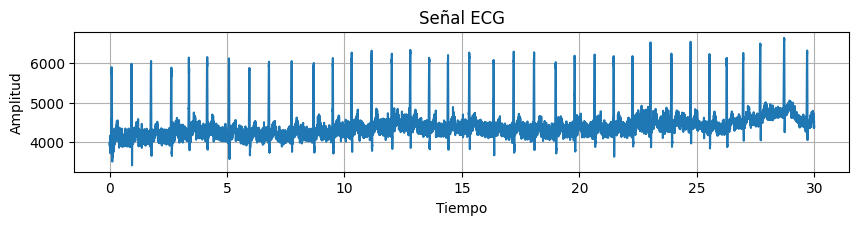

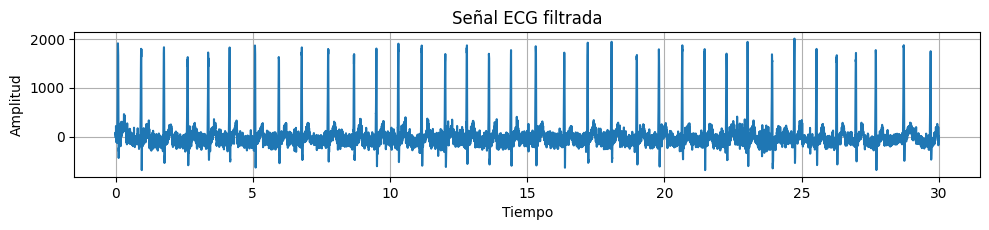

In [9]:
#Grafica señal ECG
plt.figure(figsize=(10,4))
plt.subplot(211)
plt.plot(vector_ECG, ECG.T)
plt.title('Señal ECG')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid()

#Grafica señal ECG filtrada
plt.figure(figsize=(10,4))
plt.subplot(212)
plt.plot(vector_ECG_filtrada, ECG_filtrada.T)
plt.title('Señal ECG filtrada')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid()

plt.tight_layout()
plt.show()

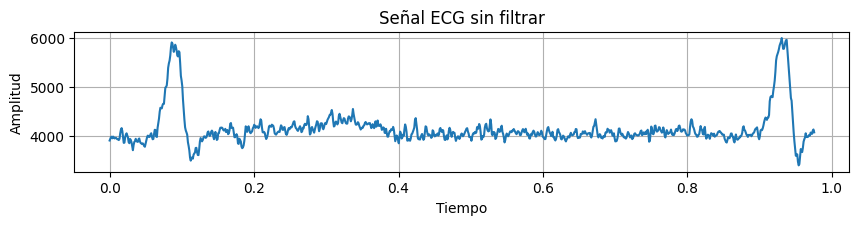

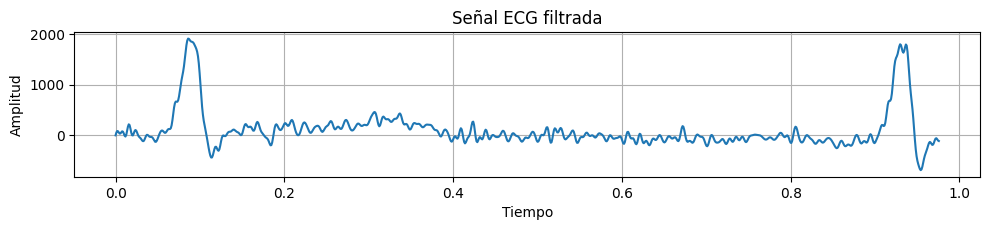

In [10]:
#Filtro pasa bajas
#Señal sin filtrar
plt.figure(figsize=(10,4))
plt.subplot(211)
plt.plot(vector_ECG[:1000],ECG.T[:1000])
plt.title('Señal ECG sin filtrar')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid()

#señal filtrada
plt.figure(figsize=(10,4))
plt.subplot(212)
plt.plot(vector_ECG_filtrada[:1000],ECG_filtrada.T[:1000])
plt.title('Señal ECG filtrada')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid()

plt.tight_layout()
plt.show()

##Agregar el comportamiento##

 3. Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el 
promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

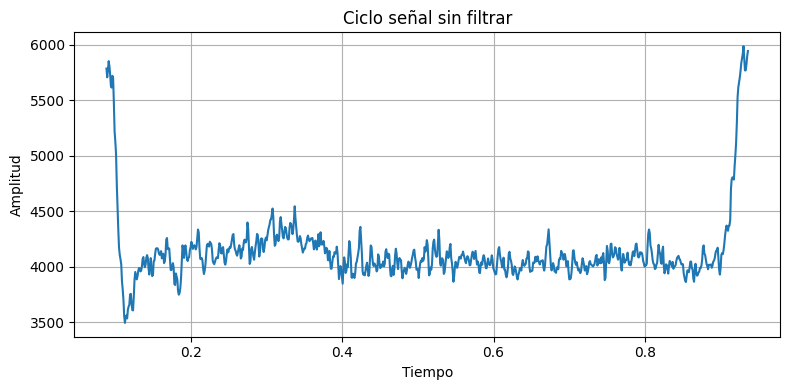

Para un ciclo de la señalsin filtrar se tiene:
Promedio: 0.51220703125 
Varianza: 0.060152928034464516 
Desviación estándar: 0.24526093866424087 
RMS:  0.5678987329589695


In [108]:

def ciclo_senal(s,t,msg=""):

    plt.figure(figsize=(8,4))    
    plt.plot(s, t)
    plt.title('Ciclo señal '+msg)
    plt.ylabel('Amplitud')
    plt.xlabel('Tiempo')
    plt.grid()

    plt.tight_layout()
    plt.show()

    promedio = np.mean(s)
    varianza = np.var(s)
    desv_estand = np.std(s)
    rms = np.sqrt(np.mean(s**2))
    print("Para un ciclo de la señal"+msg+" se tiene:\nPromedio: "+str(promedio)+" \nVarianza: "+str(varianza)+" \nDesviación estándar: "+str(desv_estand)+" \nRMS:  "+str(rms))


s= vector_ECG[90:960] 
t = ECG.T[90:960]
ciclo_senal(s,t,"sin filtrar")


4.  Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados 
obtenidos en el ítem anterior. 

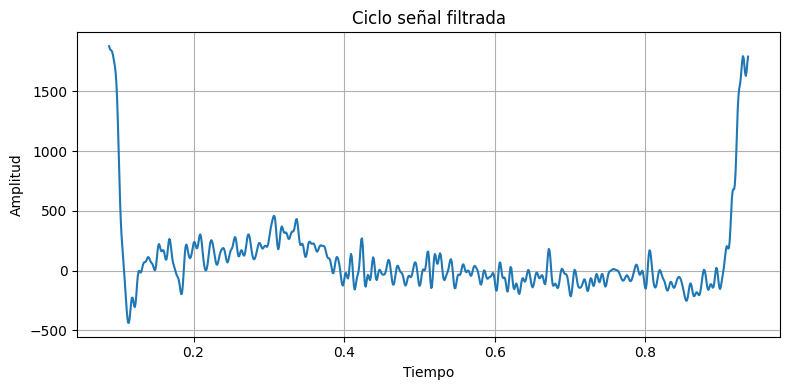

Para un ciclo de la señalfiltrada se tiene:
Promedio: 0.51220703125 
Varianza: 0.060152928034464516 
Desviación estándar: 0.24526093866424087 
RMS:  0.5678987329589695


In [95]:

s= vector_ECG_filtrada[90:960] 
t = ECG_filtrada.T[90:960]
ciclo_senal(s,t,"filtrada")

5.  Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?


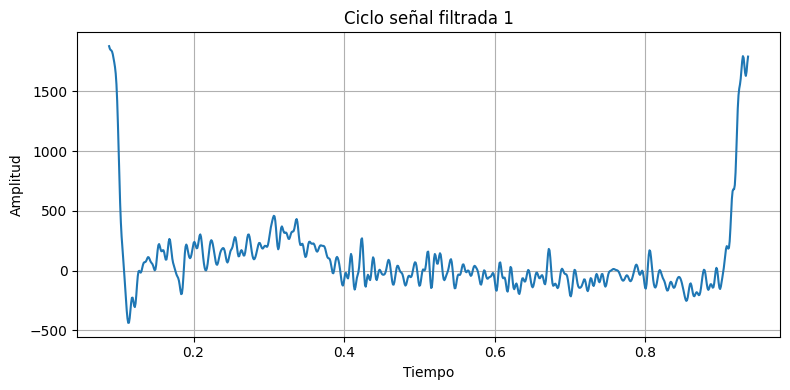

Para un ciclo de la señalfiltrada 1 se tiene:
Promedio: 0.51220703125 
Varianza: 0.060152928034464516 
Desviación estándar: 0.24526093866424087 
RMS:  0.5678987329589695


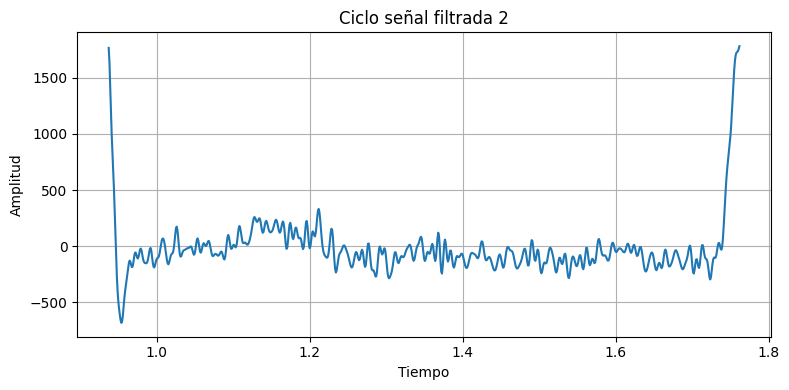

Para un ciclo de la señalfiltrada 2 se tiene:
Promedio: 1.349609375 
Varianza: 0.05674552917480469 
Desviación estándar: 0.2382132010926445 
RMS:  1.370471084796281


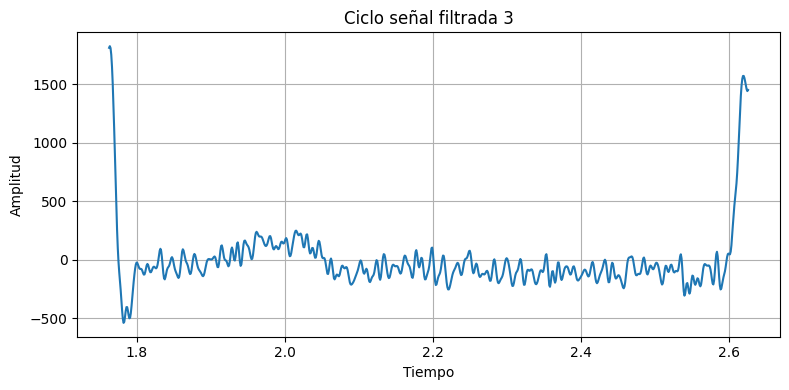

Para un ciclo de la señalfiltrada 3 se tiene:
Promedio: 2.1943359375 
Varianza: 0.06224505106608073 
Desviación estándar: 0.24948958107720798 
RMS:  2.2084735130107593


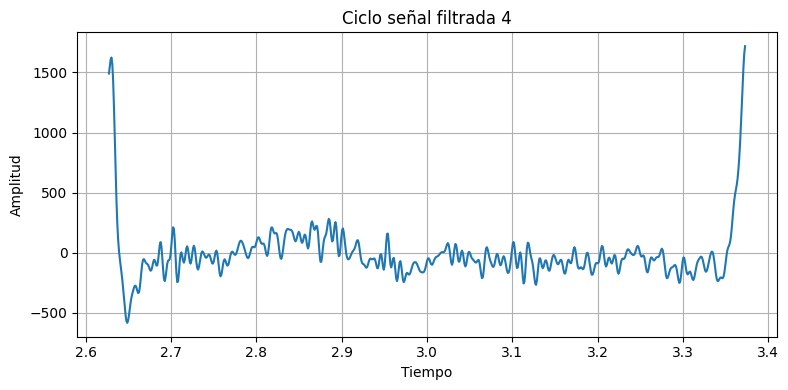

Para un ciclo de la señalfiltrada 4 se tiene:
Promedio: 3.0 
Varianza: 0.0465094248453776 
Desviación estándar: 0.215660438758196 
RMS:  3.0077415821252624


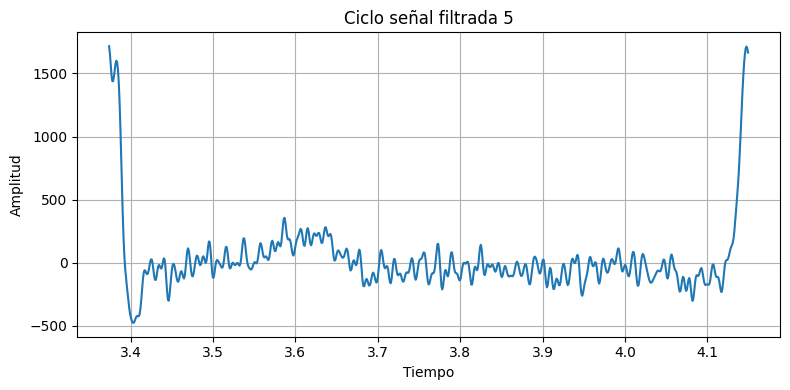

Para un ciclo de la señalfiltrada 5 se tiene:
Promedio: 3.76171875 
Varianza: 0.05022875467936198 
Desviación estándar: 0.22411772504503516 
RMS:  3.768389139775897


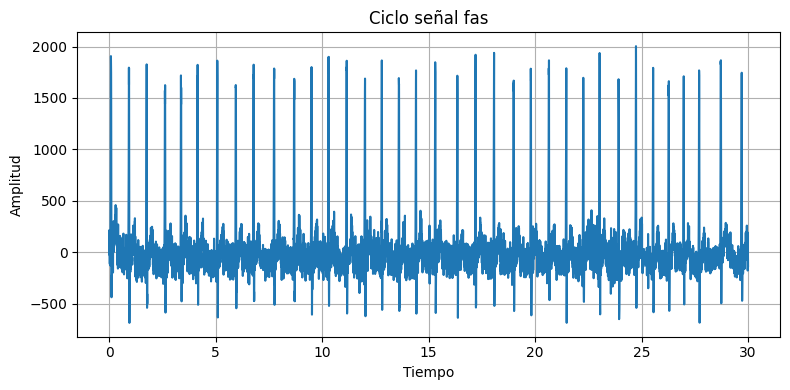

Para un ciclo de la señalfas se tiene:
Promedio: 14.99951171875 
Varianza: 74.99999992052715 
Desviación estándar: 8.660254033256019 
RMS:  17.320085211148523
29.9990234375
[[ 8.87103896e-03  5.62737497e+01  8.57077127e+01 ... -1.20952610e+02
  -1.31734356e+02 -1.32898021e+02]]


In [116]:

s=vector_ECG_filtrada[90:960] 
t = ECG_filtrada.T[90:960]
ciclo_senal(s,t,"filtrada 1")

s=vector_ECG_filtrada[960:1805] 
t = ECG_filtrada.T[960:1805]
ciclo_senal(s,t,"filtrada 2")

s=vector_ECG_filtrada[1805:2690] 
t = ECG_filtrada.T[1805:2690]
ciclo_senal(s,t,"filtrada 3")

s=vector_ECG_filtrada[2690:3455] 
t = ECG_filtrada.T[2690:3455]
ciclo_senal(s,t,"filtrada 4")

s=vector_ECG_filtrada[3455:4250] 
t = ECG_filtrada.T[3455:4250]
ciclo_senal(s,t,"filtrada 5")



###PROBANDO...
sss= np.array(vector_ECG_filtrada[0:]) 
ttt = ECG_filtrada.T[0:]
ciclo_senal(sss,ttt,"fas")
max = np.max(sss)
print(max)

print(ECG_filtrada)
# for i in s:
#     if i >= 1600 and (i+1)<i:
#         print("R"+i)


6.  Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine 
estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios 
para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos 
son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la 
estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico 
(prueba U de Mann-Whitney).

7.  Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal 
(Estacionariedad)